In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


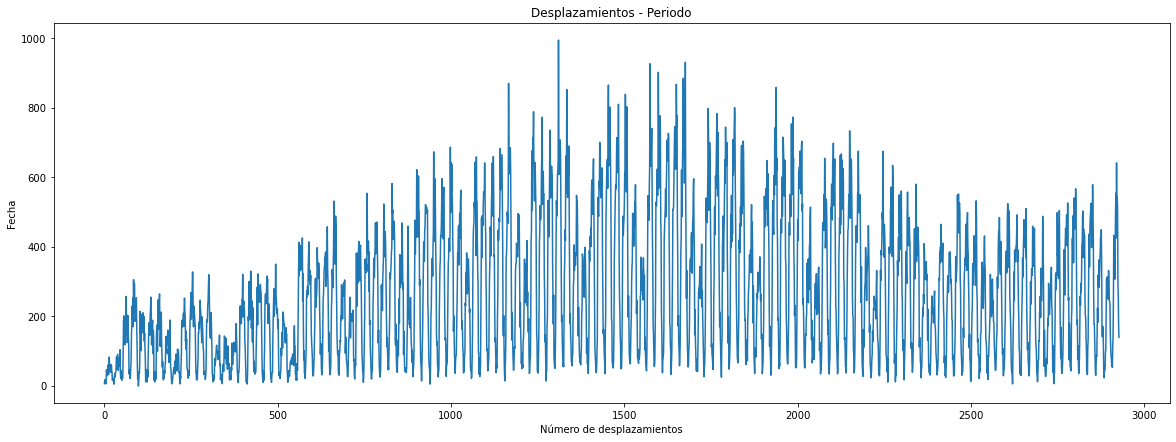

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Dividimos el periodo 1 en 2 subconjuntos - Desescalada y Nueva normalidad
## Desescalada: 2 Mayo - 8 Junio

In [7]:
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoDesescalada = Periodo1.loc[mask]

## Nueva normalidad: 9 Junio - 31 Agosto

In [8]:
start_date = pd.Timestamp('2020-06-09')
end_date = pd.Timestamp('2020-08-31 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoNnormalidad = Periodo1.loc[mask]

# IMPLEMENTACIÓN DE MODELO PROPHET
## Separamos el conjunto de datos de entrenamiento y prueba

In [9]:
PeriodoDesescalada = PeriodoDesescalada.set_index('ds')
PeriodoNnormalidad = PeriodoNnormalidad.set_index('ds')

In [10]:
#Desescalada
train_end_D = datetime.datetime(2020,6,7,23,0,0)
test_end_D = datetime.datetime(2020,6,8,23,0,0)

train_data_D = PeriodoDesescalada[:train_end_D]
test_data_D = PeriodoDesescalada[train_end_D + timedelta(hours=1):test_end_D]

#Nueva Normalidad
train_end_N = datetime.datetime(2020,8,30,23,0,0)
test_end_N = datetime.datetime(2020,8,31,23,0,0)

train_data_N = PeriodoNnormalidad[:train_end_N]
test_data_N = PeriodoNnormalidad[train_end_N + timedelta(hours=1):test_end_N]

In [11]:
train_data_D = train_data_D.reset_index()
train_data_N = train_data_N.reset_index()

test_data_D = test_data_D.reset_index()
test_data_N = test_data_N.reset_index()

# Desescalada

## Aplicamos Rolling Forecasting para evaluación del modelo

In [12]:
# Se crea una función de predicción continua
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data_D.copy()   # El problema es en history   
    
    for t in range(len(test_data_D)):        
        m = Prophet()                
           
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')       
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data_D[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data_D[['ds','y']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -38.1681
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1561.6    0.00135661       96.5398           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       1561.73   0.000458035       74.4686   6.251e-06       0.001      179  LS failed, Hessian reset 
     174       1561.88   4.63984e-05       84.0503   7.591e-07       0.001      309  LS failed, Hessian reset 
     199        1561.9    0.00015163       71.5753           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1561.9   9.67724e-07       67.9203      0.6153      0.6153      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330        1561.9   1.08458e-07       72.3939      0.5234      0.5234      505   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -32.3536
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       1564.02   0.000322167       74.1106   4.033e-06       0.001      155  LS failed, Hessian reset 
      99       1564.05   6.58399e-06       64.6051      0.5014      0.5014      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       1564.06   1.43266e-05       74.1065    2.06e-07       0.001      226  LS failed, Hessian reset 
     134       1564.06   7.81565e-08       65.1796      0.1882           1      257   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -37.1258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       1565.84    0.00189353       95.3978   2.376e-05       0.001      152  LS failed, Hessian reset 
      99       1565.93   4.78045e-05       72.9415      0.2094           1      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       1565.93   1.23161e-05       72.9827   1.393e-07       0.001      244  LS failed, Hessian reset 
     159       1565.93   6.79672e-08       67.5292      0.3781           1      282   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -46.6063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       1566.89    0.00120854       73.1547   1.784e-05       0.001      141  LS failed, Hessian reset 
      99       1566.93   1.07674e-05       62.4854           1           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       1566.93   3.60695e-08       70.1575       0.252           1      202   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -42.4919
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78        1568.5   0.000986113       99.5675   1.141e-05       0.001      151  LS failed, Hessian reset 
      99       1568.56   3.73052e-06       74.2808      0.4965      0.4965      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       1568.62   0.000212861       74.0649   2.892e-06       0.001      280  LS failed, Hessian reset 
     199       1568.66   1.21094e-05       80.7913         0.3           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       1568.67   8.15729e-06       76.8316   1.004e-07       0.001      398  LS failed, Hessian reset 
     223       1568.67   6.55118e-08       65.3423      0.1846      0.5532      427   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -41.078
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       1570.05   0.000910509       141.694   1.022e-05       0.001      118  LS failed, Hessian reset 
      99       1570.18   4.03383e-05       72.1091      0.5952      0.5952      155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       1570.19   5.42451e-05        79.468   7.441e-07       0.001      206  LS failed, Hessian reset 
     142       1570.19   7.05253e-06       84.6377   1.036e-07       0.001      282  LS failed, Hessian reset 
     164       1570.19   6.41903e-08       70.9179      0.5177      0.5177      308   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -34.334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1572.07   4.85291e-05       74.4401           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       1572.07   3.04073e-05       86.3577   4.349e-07       0.001      211  LS failed, Hessian reset 
     153       1572.07   4.49061e-08       61.8695      0.1296      0.5688      240   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -19.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1574.55   0.000110825       64.2003      0.6071      0.6071      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       1574.57    9.3285e-08       68.0124           1           1      205   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.9561
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1576.03    0.00306081       70.0219           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       1576.28     0.0011414       144.268   1.245e-05       0.001      157  LS failed, Hessian reset 
     199       1576.42   0.000375658       80.1244           1           1      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       1576.46   6.61708e-08       73.2857      0.3006           1      373   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -36.7092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1571.41   0.000892894       92.3199      0.6804      0.6804      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1574.43   4.37333e-06       80.1816           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249       1574.43    6.1543e-08       67.1711      0.2147           1      312   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -23.6717
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1575.64    0.00146836       88.3321           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       1576.25   0.000385159       94.1256   5.518e-06       0.001      208  LS failed, Hessian reset 
     199        1576.3    3.0988e-07       83.5587      0.3663      0.3663      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211        1576.3   2.74454e-06       79.2218   3.041e-08       0.001      339  LS failed, Hessian reset 
     226        1576.3   2.61412e-08       74.0603      0.1472      0.1472      356   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.3262
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       1572.26    0.00201384       206.914   2.185e-05       0.001      140  LS failed, Hessian reset 
      99       1572.81    0.00494152       107.439           1           1      146   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1576.32   2.38754e-05        73.096           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       1576.33   2.75802e-05       86.2841   4.063e-07       0.001      390  LS failed, Hessian reset 
     299       1576.34   4.03564e-07       77.7843      0.2891           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     379        1576.4   2.11085e-05       75.9173   2.522e-07       0.001      580  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -31.5833
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1574.74     0.0110587       92.8495           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       1577.01   0.000450882       72.9062   5.134e-06       0.001      254  LS failed, Hessian reset 
     199       1577.21   0.000104808       76.0363           1           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       1577.23   1.05672e-05       84.0993   1.349e-07       0.001      377  LS failed, Hessian reset 
     255       1577.23   9.36702e-09       73.4557      0.1076      0.1076      404   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.8285
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       1574.69    0.00128501       175.168   6.647e-06       0.001      147  LS failed, Hessian reset 
      99       1575.08    0.00167689       115.945      0.9211      0.9211      150   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       1577.19     0.0056338       251.511   7.321e-05       0.001      261  LS failed, Hessian reset 
     199       1578.65     0.0126731       108.592      0.2501           1      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       1578.99    4.0681e-05       86.5101    4.79e-07       0.001      431  LS failed, Hessian reset 
     278       1578.99   7.10052e-08       64.4813      0.9039      0.9039      469   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -62.1286
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1629.48     0.0154748       290.126      0.4271      0.8808      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       1632.49    0.00102395       154.242   8.049e-06       0.001      184  LS failed, Hessian reset 
     181       1634.38   0.000865442       136.524   5.754e-06       0.001      290  LS failed, Hessian reset 
     199       1634.57    0.00039442       84.2322           1           1      316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245        1634.8   9.81048e-08       73.8022      0.1998           1      373   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.5163
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1631.21     0.0340863       118.951           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       1633.56    0.00190997       112.543   1.929e-05       0.001      189  LS failed, Hessian reset 
     187       1634.84    0.00234807       105.019   2.497e-05       0.001      305  LS failed, Hessian reset 
     199       1635.12   0.000390453       86.7556           1           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       1635.27   1.25029e-07       85.9426      0.2246           1      389   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -49.7578
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1629.15    0.00636985        116.93      0.1743           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       1631.51   0.000789149       108.193   6.959e-06       0.001      190  LS failed, Hessian reset 
     185       1633.45    0.00247898       90.2764   2.868e-05       0.001      307  LS failed, Hessian reset 
     199       1633.65   2.48395e-05       71.9551     0.06933     0.06933      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       1633.69   3.48996e-05       86.6616   4.786e-07       0.001      504  LS failed, Hessian reset 
     299       1633.69   1.41179e-05       78.3425           1           1      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -32.7929
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1628.76   0.000303559       81.9119           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1634.19    0.00167036       195.016   1.711e-05       0.001      293  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       1634.59   9.80384e-09       72.0949      0.1514      0.1514      393   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.4971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1634.27    0.00360125       112.633           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       1636.45    0.00180837       90.8519   1.855e-05       0.001      228  LS failed, Hessian reset 
     199       1636.58   8.81913e-06       76.0413      0.3655           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208        1636.6   0.000334007       91.2511   3.459e-06       0.001      359  LS failed, Hessian reset 
     258       1636.62   5.22591e-06       82.7827   6.055e-08       0.001      472  LS failed, Hessian reset 
     276       1636.62   1.27485e-07       70.9205           1           1      497   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -56.7511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       1627.19    0.00685435        366.07   6.941e-05       0.001      146  LS failed, Hessian reset 
      99       1629.05    0.00218472       87.1522      0.3948           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       1630.06    0.00198723       176.125   1.985e-05       0.001      248  LS failed, Hessian reset 
     197       1632.34    0.00177335       217.372   1.899e-05       0.001      369  LS failed, Hessian reset 
     199       1632.44   0.000408124       83.2646           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278       1632.84   2.58526e-08       74.0992     0.09012     0.09012      467   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -36.2025
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1631.12    0.00560507       96.8858           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132        1633.3   0.000664947       75.2195   3.715e-06       0.001      211  LS failed, Hessian reset 
     191       1633.82   1.20916e-06       74.4916   1.596e-08       0.001      326  LS failed, Hessian reset 
     199       1633.82   2.34215e-07       66.1726           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       1633.82   8.70626e-08       65.9856      0.2227           1      343   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -35.4529
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       1630.38   0.000749651       104.705   4.819e-06       0.001      148  LS failed, Hessian reset 
      99       1631.16   0.000703989       81.5688      0.8157      0.8157      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     178       1634.34    0.00226714       96.5902   2.002e-05       0.001      303  LS failed, Hessian reset 
     199       1634.51   1.33603e-05       66.5887      0.1907           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1634.6   8.77527e-06       73.6691           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315        1634.6   1.58424e-07       71.6844      0.6224     0.06224      476   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -17.9195
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       1635.51   0.000841812       142.847   8.123e-06       0.001      143  LS failed, Hessian reset 
      99       1635.69   0.000101254       75.9168      0.3019           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       1636.16    0.00109406       89.6409   1.297e-05       0.001      253  LS failed, Hessian reset 
     185       1636.28   0.000121771       77.8145   1.354e-06       0.001      344  LS failed, Hessian reset 
     199       1636.28   1.17484e-06       77.8169       1.377      0.3209      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       1636.28   5.26698e-09       69.3682     0.06075     0.06075      384   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -18.006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1638.04   0.000755241       75.4594      0.2953      0.9844      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       1638.39    0.00121715       168.361   1.485e-05       0.001      195  LS failed, Hessian reset 
     199       1638.58   3.35008e-06       79.8817      0.4127      0.4127      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       1638.59   8.83222e-08       64.3973      0.1982      0.8048      362   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/2088665197.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_com

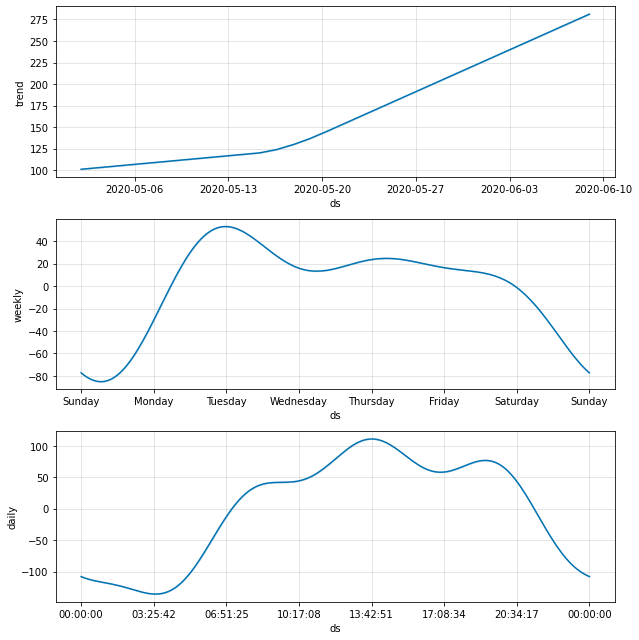

In [13]:
fig, predictions_rolling = rolling_forecast()

In [14]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data_D = test_data_D.set_index('ds')

In [15]:
residuals_rolling = test_data_D['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-06-08 00:00:00,-24.843196
2020-06-08 01:00:00,-48.976283
2020-06-08 02:00:00,-94.268646
2020-06-08 03:00:00,-69.341385
2020-06-08 04:00:00,-66.989391


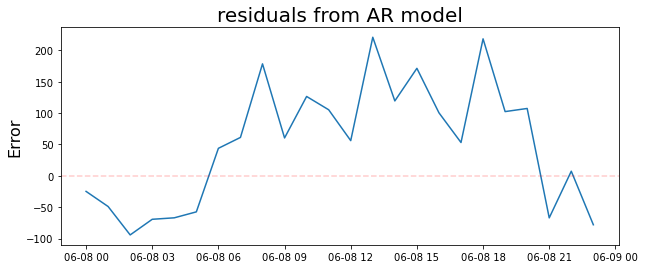

In [16]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

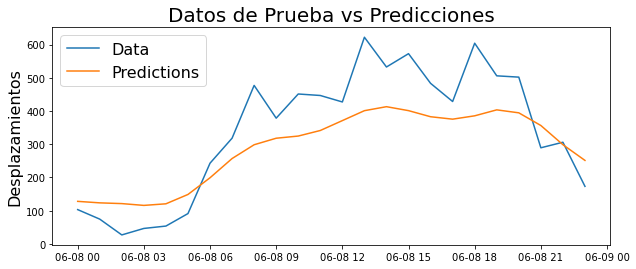

In [17]:
plt.figure(figsize=(10,4))
plt.plot(test_data_D)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [18]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_D['y'])),4))

Mean Absolute Percent Error: 0.5005


# RMSE

In [19]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_D.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    108.377686
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


108.37768626688317

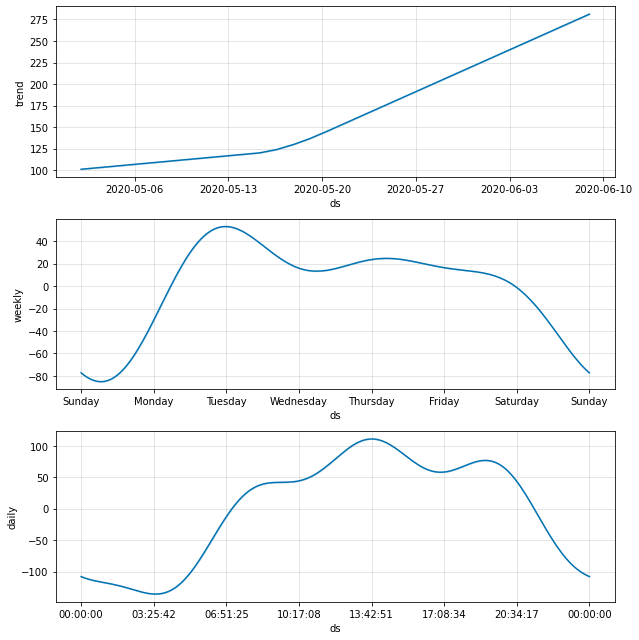

In [20]:
fig

In [21]:
#Reiniciamos
test_data_N = test_data_N.reset_index()

# Nueva Normalidad
## Aplicamos Rolling Forecasting para evaluación del modelo

In [22]:
# Se crea una función de predicción continua
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data_N.copy()   # El problema es en history   
    
    for t in range(len(test_data_N)):        
        m = Prophet()       
    
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')                  
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data_N[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data_N[['ds','y']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.8405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3887.95    0.00883469       159.066      0.7188      0.7188      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       3889.27   0.000198609       99.8618   2.281e-06       0.001      245  LS failed, Hessian reset 
     199       3889.48   1.51587e-05       73.6113      0.4861      0.4861      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       3890.12   0.000705271       193.965   1.055e-05       0.001      443  LS failed, Hessian reset 
     299       3890.23   0.000469415       47.3441      0.3685           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       3890.24     2.572e-05       47.5337   6.677e-07       0.001      510  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -94.4774
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      53       3884.98    0.00175162       144.989   3.058e-05       0.001       99  LS failed, Hessian reset 
      92       3890.14   0.000193391       86.5486   1.788e-06       0.001      189  LS failed, Hessian reset 
      99       3890.71    0.00127943       193.802      0.8585      0.8585      197   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       3890.98   0.000389111       124.299   5.774e-06       0.001      261  LS failed, Hessian reset 
     174       3891.68   0.000124544       49.9309   1.307e-06       0.001      373  LS failed, Hessian reset 
     199       3891.76   0.000407162       57.3853       6.637           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278       3892.27   0.000551068       199.553   5.483e-06   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -95.4564
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       3890.17   0.000316613       94.6534    1.18e-06       0.001      131  LS failed, Hessian reset 
      99       3892.66    0.00330737       80.2203      0.1417           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101        3892.7    0.00105052       192.796   1.528e-05       0.001      204  LS failed, Hessian reset 
     143       3893.37   0.000478109       148.014   6.329e-06       0.001      307  LS failed, Hessian reset 
     199       3893.62     0.0112428       115.772           1           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       3893.69     0.0013816       106.158   1.193e-05       0.001      413  LS failed, Hessian reset 
     299       3894.36   0.000353552        72.286           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -100.617
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3894.53    0.00220568       255.672           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       3894.91   2.38625e-05       44.9823   5.109e-07       0.001      256  LS failed, Hessian reset 
     199        3895.1   0.000431373       88.1573      0.4288      0.4288      316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       3895.59    0.00100972        143.16   1.203e-05       0.001      371  LS failed, Hessian reset 
     299       3895.82   0.000213451        95.298   2.231e-06       0.001      544  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       3895.84   2.80265e-05       42.7316   4.549e-07       0.001      620 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -97.2664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3895.15   0.000402046       93.5753      0.3934      0.3934      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       3896.11    0.00127444       91.3214   1.923e-05       0.001      195  LS failed, Hessian reset 
     140       3896.43   0.000272525       124.102   2.377e-06       0.001      251  LS failed, Hessian reset 
     194       3896.65   0.000138013       65.6657   1.458e-06       0.001      361  LS failed, Hessian reset 
     199        3896.7   0.000428989       70.0424           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       3896.97   0.000198058       104.993   2.013e-06       0.001      477  LS failed, Hessian reset 
     299       3897.15   0.000126911       58.6755           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -101.732
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3897.99     0.0013034       109.837      0.9151      0.9151      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3899.11    0.00205638       61.9913           1           1      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       3899.13   0.000818345        128.46    1.32e-05       0.001      316  LS failed, Hessian reset 
     235       3899.23   1.44432e-05       59.9727   2.997e-07       0.001      413  LS failed, Hessian reset 
     248       3899.23   1.46822e-07       45.3687      0.2555           1      438   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -89.3186
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3899.2     0.0029362       302.278       0.038           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       3900.06   0.000201616       63.8301    2.76e-06       0.001      263  LS failed, Hessian reset 
     199       3900.15    0.00151958       83.2326           1           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       3900.21   0.000547449       117.184   1.448e-05       0.001      367  LS failed, Hessian reset 
     271       3900.33   0.000118153       35.6196   1.608e-06       0.001      496  LS failed, Hessian reset 
     295       3900.33   4.13158e-07       52.7819           1           1      534   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -83.9429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3901.42    0.00188734       56.4716       3.309           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3902.61    0.00182065       153.019      0.6394      0.6394      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244        3902.9    0.00015062       75.4224   2.002e-06       0.001      379  LS failed, Hessian reset 
     279       3902.96   8.82686e-06       37.2758   1.936e-07       0.001      466  LS failed, Hessian reset 
     283       3902.96   1.60938e-06       43.2693   4.981e-08       0.001      504  LS failed, Hessian reset 
     290       3902.96    3.4877e-07       50.9069           1           1      520   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -69.547
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3903.4   0.000843053       69.3842           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       3903.67   4.74652e-05       40.6377   1.204e-06       0.001      191  LS failed, Hessian reset 
     130       3903.75    0.00041671       142.451   4.755e-06       0.001      252  LS failed, Hessian reset 
     186       3904.35   0.000103383       48.3399   2.115e-06       0.001      371  LS failed, Hessian reset 
     199       3904.52    0.00119907       86.8827      0.5359      0.5359      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       3904.67   0.000341593        81.495   4.775e-06       0.001      468  LS failed, Hessian reset 
     242       3904.68   2.91416e-06       38.5797   6.772e-08    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -63.4523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3904.29   0.000433933       140.297   4.083e-06       0.001      159  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       3904.84   0.000146255       59.4399   1.401e-06       0.001      262  LS failed, Hessian reset 
     199       3905.14   3.78801e-05       35.6037      0.7975      0.7975      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       3905.18   0.000391683       43.6812   5.561e-06       0.001      384  LS failed, Hessian reset 
     278       3905.45   0.000116671       49.2047   2.624e-06       0.001      519  LS failed, Hessian reset 
     299       3905.57    0.00323106         107.1           1           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -63.0695
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3905.02   0.000419416       61.9058           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       3905.76   0.000337931        145.44    1.62e-06       0.001      169  LS failed, Hessian reset 
     181        3906.8   0.000314186        106.83   5.216e-06       0.001      296  LS failed, Hessian reset 
     199       3907.06   0.000670115       55.9846       1.875      0.6398      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3907.75   0.000256122       40.1928           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     359          3908   0.000798337       205.405   5.404e-06       0.001      599  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -62.9159
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3907.02   0.000914285       53.1816      0.3052      0.3052      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       3907.66    0.00021615       99.0559   1.721e-06       0.001      180  LS failed, Hessian reset 
     163       3908.76   0.000357688       140.811   3.486e-06       0.001      275  LS failed, Hessian reset 
     199       3909.23   0.000373289       67.0388           1           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3909.37   0.000735754       68.4519      0.1119      0.6057      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       3909.64   0.000257793       125.944   2.319e-06       0.001      557  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -65.4212
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3910.01    0.00123389       87.5593           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102        3910.2   0.000752657       166.303   6.525e-06       0.001      179  LS failed, Hessian reset 
     159       3911.27   0.000223092       108.941   3.292e-06       0.001      286  LS failed, Hessian reset 
     186       3911.45   0.000153294       67.5456   3.389e-06       0.001      369  LS failed, Hessian reset 
     199       3911.49    0.00122263       66.0028           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       3911.51    2.9249e-05       42.8075   5.375e-07       0.001      453  LS failed, Hessian reset 
     236       3911.51   2.17986e-09       64.5092    0.002612   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -62.9384
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       3912.15   0.000326212        128.92   2.101e-06       0.001      150  LS failed, Hessian reset 
      99       3913.01   0.000145774       49.0876           1           1      176   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3914.25   1.52957e-05       45.5716           1           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       3914.26   5.65637e-06       48.5134   1.056e-07       0.001      389  LS failed, Hessian reset 
     227       3914.26   5.55935e-07       36.3991        1.47      0.3779      407   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -66.0855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       3915.26    0.00186092       144.881   3.235e-05       0.001      153  LS failed, Hessian reset 
      99       3915.41   0.000566818       95.6715           1           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       3915.66   0.000142147       67.8202   1.716e-06       0.001      213  LS failed, Hessian reset 
     158       3916.27    0.00141835       117.375   2.508e-05       0.001      316  LS failed, Hessian reset 
     174       3916.34   8.61482e-05       46.0146   1.774e-06       0.001      377  LS failed, Hessian reset 
     194       3916.35   1.59222e-07       54.7705     0.02514           1      414   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -71.6398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3916.47    0.00443607       288.403           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       3917.84   0.000110037       75.6459   2.132e-06       0.001      239  LS failed, Hessian reset 
     172       3917.93   0.000260876            48   6.557e-06       0.001      297  LS failed, Hessian reset 
     199          3918    0.00248167       77.9199           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3918.72    0.00189249       66.7917      0.3096           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       3918.81   0.000211781       49.7776   1.156e-06       0.001      527  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -63.2633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3918.65    0.00105913       130.046      0.7271      0.7271      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       3919.29   0.000278174       108.776   3.245e-06       0.001      188  LS failed, Hessian reset 
     154       3920.07   3.64267e-06       34.9652   7.671e-08       0.001      283  LS failed, Hessian reset 
     199       3920.61   0.000872363       56.5062           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       3920.77   0.000218743       61.6708    4.28e-06       0.001      430  LS failed, Hessian reset 
     299       3920.88   0.000708285       71.6652           1           1      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -83.5447
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3918.92    0.00396238       219.971      0.2796      0.2796      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3920.59    0.00133722       95.9678           1           1      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       3920.74   7.34069e-05       61.2241    9.45e-07       0.001      390  LS failed, Hessian reset 
     283       3920.77   2.74829e-05       34.4735   5.176e-07       0.001      471  LS failed, Hessian reset 
     299       3920.77   2.49958e-06       37.9848           1           1      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       3920.77   4.22129e-07       46.7748           1           1      511   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -65.9243
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3922.05   0.000130487       54.6259      0.8181      0.8181      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       3922.22   0.000222343       84.7352   3.187e-06       0.001      195  LS failed, Hessian reset 
     138       3922.34   0.000157502       78.0441   2.098e-06       0.001      272  LS failed, Hessian reset 
     180       3922.66   0.000330032       70.1208   6.546e-06       0.001      365  LS failed, Hessian reset 
     199       3922.79    0.00196189       74.5075           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       3922.98   6.82624e-05        35.929   1.931e-06       0.001      488  LS failed, Hessian reset 
     256       3922.99   2.08719e-05       64.9084   4.311e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -70.4127
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3923.19    0.00117645       81.5328           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       3924.69   2.55236e-05       47.2722   6.592e-07       0.001      254  LS failed, Hessian reset 
     178       3924.72   0.000227341       81.8495   4.017e-06       0.001      315  LS failed, Hessian reset 
     199       3924.73   4.53483e-05       49.7198          10           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       3925.31   0.000188776       53.6498   1.192e-06       0.001      445  LS failed, Hessian reset 
     271       3925.35   0.000332298       60.6249   5.274e-06       0.001      525  LS failed, Hessian reset 
     294       3925.36   3.62683e-08       37.8919     0.03919   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -67.3271
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59       3923.87    0.00139308       116.973   1.452e-05       0.001      116  LS failed, Hessian reset 
      99       3925.89    0.00124605       164.587      0.9121      0.9121      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       3926.87    0.00017344       79.3961   1.955e-06       0.001      263  LS failed, Hessian reset 
     199       3927.16   0.000277496        68.163      0.9267      0.9267      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       3927.89   0.000172279       77.2102   3.177e-06       0.001      481  LS failed, Hessian reset 
     299       3927.92   9.43349e-06       61.9477      0.2555           1      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -66.5512
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3926.78      0.020532       334.344      0.5229      0.5229      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       3927.04   0.000253765       69.8232   1.183e-06       0.001      171  LS failed, Hessian reset 
     199       3928.11   0.000662729       76.2763      0.3593           1      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       3928.27   0.000324967       105.013   5.307e-06       0.001      362  LS failed, Hessian reset 
     278       3928.33   7.62691e-06       43.3834   1.803e-07       0.001      522  LS failed, Hessian reset 
     299       3928.34   0.000121787       78.0086      0.1888           1      552   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -69.5907
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3927.54     0.0212685       161.586           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       3928.56    0.00017661       46.2624   1.139e-06       0.001      212  LS failed, Hessian reset 
     196       3929.42   7.34841e-07       47.3381      0.2321           1      307   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -79.8992
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3929.09     0.0004761       105.847      0.5286      0.5286      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       3929.64   0.000301166       145.444   3.186e-06       0.001      179  LS failed, Hessian reset 
     148       3931.09   0.000186159       56.4188   1.175e-06       0.001      280  LS failed, Hessian reset 
     199       3931.47   0.000207635       43.8694           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       3931.47   1.98291e-07       61.1868      0.2674           1      379   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4340/845695912.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp

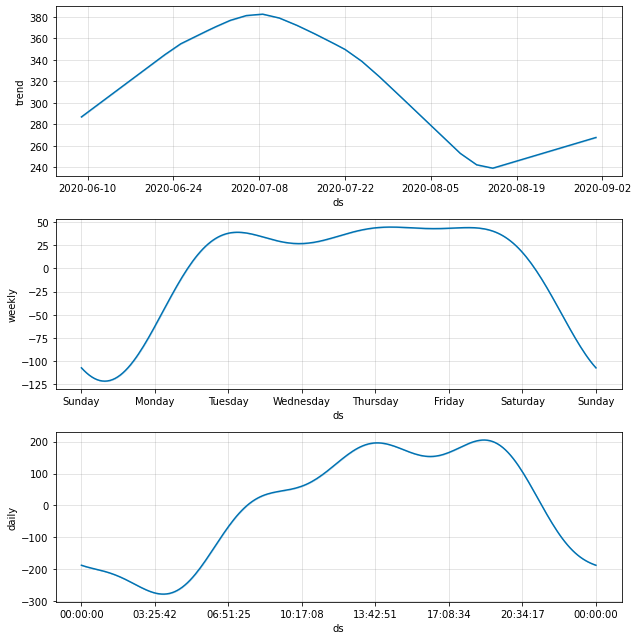

In [23]:
fig, predictions_rolling = rolling_forecast()

In [24]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data_N = test_data_N.set_index('ds')

In [25]:
residuals_rolling = test_data_N['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-08-31 00:00:00,81.456307
2020-08-31 01:00:00,87.473408
2020-08-31 02:00:00,81.256153
2020-08-31 03:00:00,123.657862
2020-08-31 04:00:00,108.856822


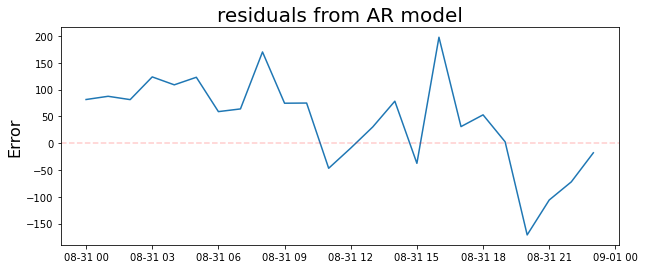

In [26]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

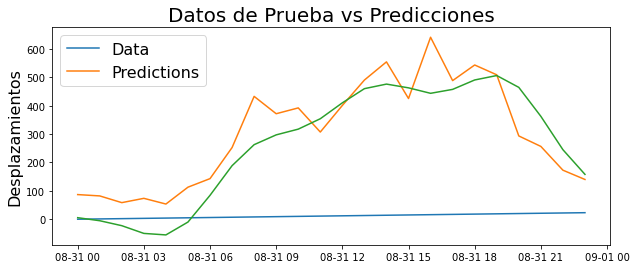

In [27]:
plt.figure(figsize=(10,4))
plt.plot(test_data_N)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [28]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_N['y'])),4))

Mean Absolute Percent Error: 0.5053


# RMSE

In [29]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_N.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    93.660558
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


93.66055786792298

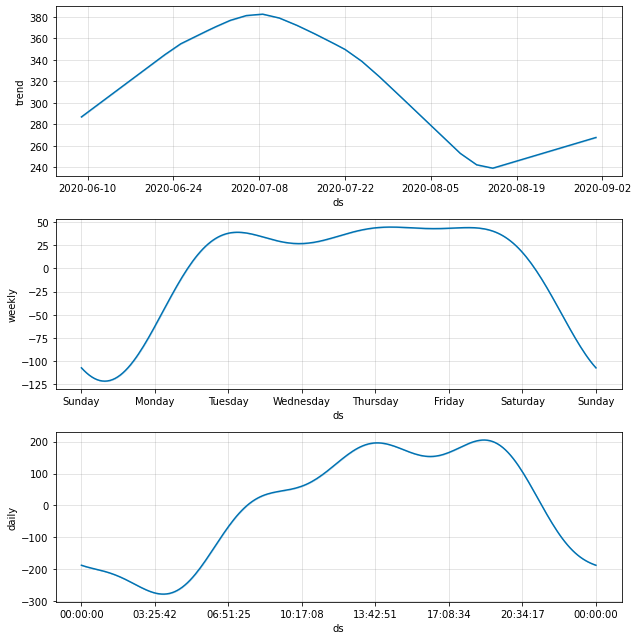

In [30]:
fig

# Graficas de Patrones 
## Desescalada

In [31]:
Patron3AM_D = Patron3AM_D.set_index('ds')
Patron8AM_D = Patron8AM_D.set_index('ds')
Patron14PM_D = Patron14PM_D.set_index('ds')
Patron16PM_D = Patron16PM_D.set_index('ds')

Patron3AM_N = Patron3AM_N.set_index('ds')
Patron8AM_N = Patron8AM_N.set_index('ds')
Patron14PM_N = Patron14PM_N.set_index('ds')
Patron16PM_N = Patron16PM_N.set_index('ds')

NameError: name 'Patron3AM_D' is not defined

In [ ]:
Patron3AM_N[Patron3AM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 3 AM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

Patron8AM_N[Patron8AM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 8 AM')
#plt.xlim([pd.to_datetime('2020-08-23 00:00:00'), pd.to_datetime('2020-08-25 23:00:00')])
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

Patron14PM_N[Patron14PM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 2 PM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

Patron16PM_N[Patron16PM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 4 PM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Nota: Creo que se puede mejorar la predicción si se ajusta el patrón tal cual como se ve en la linea de tiempo (123) y se entrena periodos concretos como desescalada y nueva normalidad.
# Con el in de avanzar propongo que muestre los resultados que has obtenido hasta ahora y lo siguiente es tratar de hacer una simulación implementando un regresor. 
# Aunque la imagen de los patrones no corresponda con la gráfica de patrones original, de todas formas está bien entrenado.